In [1]:
from fastai import *
from fastai.vision import *
import numpy as np
import scipy

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

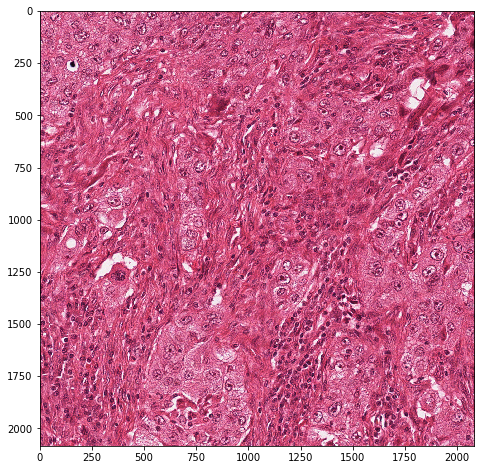

In [4]:
plt.rcParams["figure.figsize"] = (12,8)
img = mpimg.imread("A00_03.png")
plt.imshow(img)

In [5]:
img.shape

(2084, 2084, 3)

In [6]:
path = "/home/jupyter/tutorials/MitosisCountChallenge/A-1/"

In [7]:
path_train = Path('/home/jupyter/tutorials/MitosisCountChallenge/A-1/train_new')
path_label = Path('/home/jupyter/tutorials/MitosisCountChallenge/A-1/label_new/')

In [8]:
def preprocess(imgs):
    imgs = resize(imgs, (512, 512, 3), preserve_range=True)
    return imgs

# Mitosis Detection

In [9]:
import numpy as np
from skimage.color import rgb2hed
from skimage.transform import resize
from skimage.measure import label, regionprops
image_paths=['A00_01', 'A00_02', 'A00_03', 'A00_04', 'A00_05', 'A00_06', 'A00_07', 'A00_09',
            'A01_00','A01_01', 'A01_02', 'A01_03', 'A01_04', 'A01_05', 'A01_06', 'A01_07', 'A01_08', 'A01_09',
            'A02_00','A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_08', 'A02_09',
            'A03_00','A03_01', 'A03_02', 'A03_03', 'A03_04', 'A03_05', 'A03_06', 'A03_07', 'A03_08', 'A03_09',
            'A04_00','A04_01', 'A04_02', 'A04_03', 'A04_04', 'A04_05', 'A04_06', 'A04_07', 'A04_08', 'A04_09']

             
X_train=[]
Y_train=[]
bb_train=[]
img_rows = 512
img_cols = 512

for k in range(len(image_paths)):
    
    image = plt.imread(path+image_paths[k]+".png")
    print(image_paths[k]+".png")
   
    image=rgb2hed(image)
    print("starting size", image.shape)
    image1 = preprocess(image)
    print("After Preprocessing:", image1.shape)
    #print("done")
    #print(image.shape)
    
    X_train.append(image[:,:,0:3])
    scipy.misc.imsave(os.path.join(path_train, image_paths[k]+".png"), image1)
    
    height=image.shape[0]
    width=image.shape[1]
    patch = np.full((height,width),255)

    f = open(path+image_paths[k]+".csv", "r")
  
    for line in f:
        lines=line.split()
        pixels=lines[0].split(",")
    
        for i in range(0,len(pixels),2):
            patch[int(pixels[i+1])][int(pixels[i])]=0
    print("Patch shape:", patch.shape)
    patch = patch[..., np.newaxis]
    patch = np.dstack([patch]*3)
    #patch = np.reshape(patch, (2084, 2084, 3))
    print("Done Reshaping")
    print(patch.shape)
    patch1 = preprocess(patch)
    scipy.misc.imsave(os.path.join(path_label, image_paths[k]+".png"), patch1)
    
    print("Done for an image:")
         
    Y_train.append(patch)
    mask = np.invert(patch)
    lbl = label(mask)
    props = regionprops(lbl)
    bb_train.append(props)
    
X_train=np.array(X_train)
Y_train=np.array(Y_train)
bb_train=np.array(bb_train)

A00_01.png
starting size (2084, 2084, 3)
After Preprocessing: (512, 512, 3)


/opt/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Patch shape: (2084, 2084)
Done Reshaping
(2084, 2084, 3)


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Done for an image:
A00_02.png
starting size (2084, 2084, 3)
After Preprocessing: (512, 512, 3)
Patch shape: (2084, 2084)
Done Reshaping
(2084, 2084, 3)
Done for an image:
A00_03.png
starting size (2084, 2084, 3)
After Preprocessing: (512, 512, 3)
Patch shape: (2084, 2084)
Done Reshaping
(2084, 2084, 3)
Done for an image:
A00_04.png
starting size (2084, 2084, 3)
After Preprocessing: (512, 512, 3)
Patch shape: (2084, 2084)
Done Reshaping
(2084, 2084, 3)
Done for an image:
A00_05.png
starting size (2084, 2084, 3)
After Preprocessing: (512, 512, 3)
Patch shape: (2084, 2084)
Done Reshaping
(2084, 2084, 3)
Done for an image:
A00_06.png
starting size (2084, 2084, 3)
After Preprocessing: (512, 512, 3)
Patch shape: (2084, 2084)
Done Reshaping
(2084, 2084, 3)
Done for an image:
A00_07.png
starting size (2084, 2084, 3)
After Preprocessing: (512, 512, 3)
Patch shape: (2084, 2084)
Done Reshaping
(2084, 2084, 3)
Done for an image:
A00_09.png
starting size (2084, 2084, 3)
After Preprocessing: (512, 5

In [10]:
X_train.shape

(48, 2084, 2084, 3)

In [11]:
Y_train.shape

(48, 2084, 2084, 3)

(512, 512, 3)
(512, 512, 3)


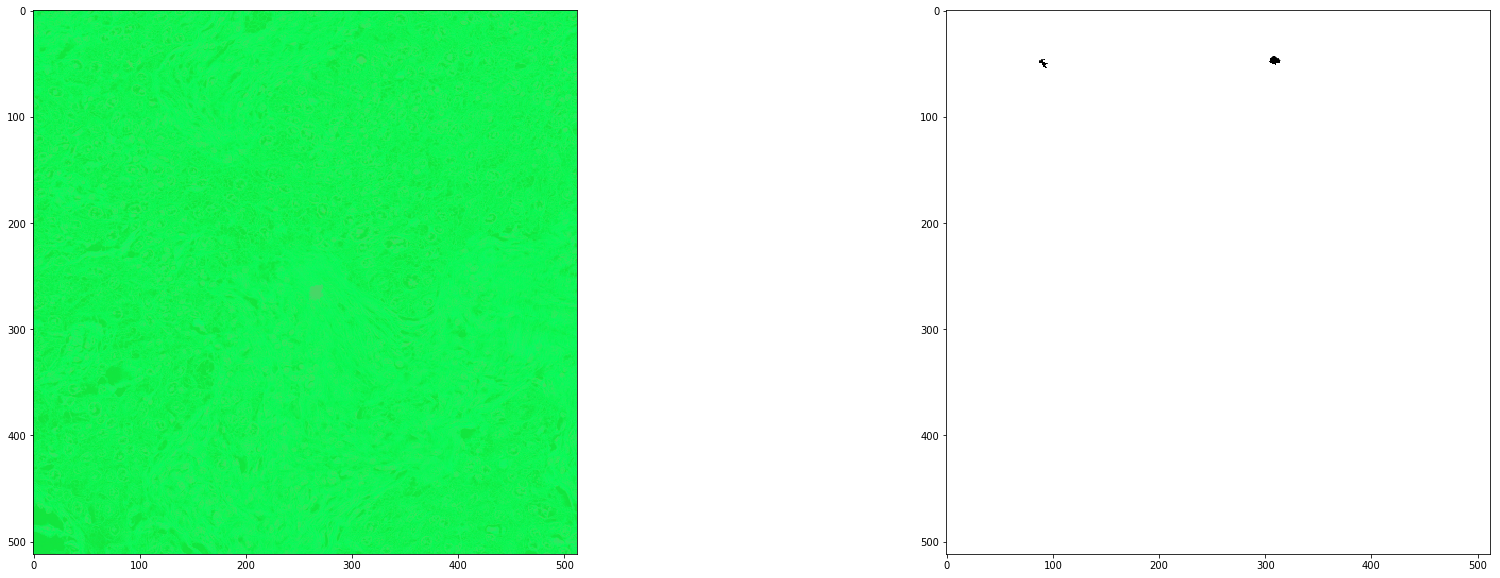

In [12]:

import matplotlib.pyplot as plt
import cv2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 10))
img2 = mpimg.imread('/home/jupyter/tutorials/MitosisCountChallenge/A-1/train_new/A00_02.png')
img3 = mpimg.imread('/home/jupyter/tutorials/MitosisCountChallenge/A-1/label_new/A00_02.png')
print(img2.shape)
print(img3.shape)
ax1.imshow(img2)
ax2.imshow(img3)


In [13]:
np.unique(img3)

array([0.      , 0.003922, 0.007843, 0.019608, 0.090196, 0.141176, 0.145098, 0.215686, 0.231373, 0.278431, 0.352941,
       0.403922, 0.443137, 0.541176, 0.611765, 0.627451, 0.823529, 1.      ], dtype=float32)

In [14]:
img4 = mpimg.imread('/home/jupyter/tutorials/MitosisCountChallenge/A-1/label_new/A03_00.png')

In [16]:
len(np.unique(img4))

97

In [ ]:
from fastai.utils.mem import *
free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

In [ ]:
Y_train.shape

In [ ]:
src_size = Y_train.shape[1]

In [ ]:
size = 256
bs = 2

In [ ]:
fnames = get_image_files(path_train)
fnames[:3]

In [ ]:
print(fnames[2])
img_f = fnames[2]
img = open_image(img_f)
img.show(figsize=(5,5))

In [ ]:
img_f

In [ ]:
get_y_fn = lambda x: path_label/f'{x.stem}.png'

In [ ]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [ ]:
classes = [1,0]

In [ ]:
src = (SegmentationItemList.from_folder(path_train)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes = classes))

In [ ]:
data = (src.transform(get_transforms(), size = size, tfm_y = True)
       .databunch(bs=2)
       .normalize(imagenet_stats))

In [ ]:
data.show_batch(2, figsize=(10,7))

In [ ]:
gc.collect()

In [ ]:
learn = unet_learner(data, models.resnet34, metrics= accuracy)

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, 1e-4)

In [ ]:
n = 2084 * 2084 *3
n

In [ ]:
np.resize(n, (512, 512))